<div style='display:flex;'>
    <!--<img src="https://apibab.pt/wp-content/uploads/2016/03/logo_ulht.png" width="200" height="200"/>-->
    <h1 style='text-align: center;'>Analysis of Alt-text use in mastodon.social by client</h1>
</div>

A project by [Cristal Rivera](https://linkedin.com/in/cristal-rivera-picado/) and [Tommaso Marmo](https://tommi.space/) to analyse the use of alt-text in [mastodon.social](https://mastodon.social/about), using [Stefan Bohacek](https://stefanbohacek.com/)’s <cite>[mastodon.social alt text use by client app](https://www.kaggle.com/datasets/fourtonfish/mastodon-social-alt-text-use-by-client-app)</cite> dataset, published on Kaggle under the [MIT license](https://www.mit.edu/~amini/LICENSE.md).

This analysis is being conducted as a group project for the [Introduction to Data Science](https://ois2.tlu.ee/tluois/subject/ULP6613-23265) course of the <cite>[Artificial Intelligence and Sustainable Societies](https://aissprogram.eu)</cite> master.

## Abstract

This project analyzes the different impact of the use of image descriptions (also known as <q>alt text</q>) for accessibility across different social network clients.

<q>Clients</q> are the interfaces through which users access social media platforms, and their design could heavily influence the process individuals go through to publish a post, includeing the addition of alt text. While it is out of the scope of this project to inquiry the nature of any specific client, we will observe trends, recurrencies, and relevant information provided by this dataset.

## Initialization

First and foremost, we are importing the libraries we will be using to manipulate the data, and the dataset source, in CSV format.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import squarify as sq
import seaborn as sns

In [2]:
''' Import and print dataset
Assigning the variable `original_data` too,
so that the original dataset can be preserved,
while we operate on the `data` variable.
'''
data = original_data = pd.read_csv('./fediverse-client-alt-text-data-2024-05-13.csv')

data

,client,status_count,descriptions_all_count,descriptions_all_percent,descriptions_some_count,descriptions_some_percent,descriptions_none_count,descriptions_none_percent
0,Web,8272,1438,17.383946,7,0.084623,6827,82.531431
1,dlvr.it,5806,1,0.017224,0,0.000000,5805,99.982776
2,Mastodon for Android,1894,270,14.255544,3,0.158395,1621,85.586061
3,unknown,1428,366,25.630252,1,0.070028,1061,74.299720
4,AboveMaidstoneBot,1339,0,0.000000,0,0.000000,1339,100.000000
...,...,...,...,...,...,...,...,...
261,socialbot,1,1,100.000000,0,0.000000,0,0.000000
262,PhonocasterMusicShare,1,0,0.000000,0,0.000000,1,100.000000
263,openvibe,1,0,0.000000,0,0.000000,1,100.000000
264,iflaapp,1,0,0.000000,0,0.000000,1,100.000000


We will be understanding and describing the fields and the values of the dataset later, in the data wrangiling section.

## Data wrangling

In the first phase of our analysis, we will be analysing, cleaning, and structuring the data set. This will help us understand more specifically the kind of information our dataset contains, also by veryfing the accuracy and the quality of its data.

In [3]:
print(f'Confirm data type of the dataset: {type(original_data)}')

Confirm data type of the dataset: <class 'pandas.core.frame.DataFrame'>


### Information about the dataset

In this section, we will be retrieving general information about the dataset.

In [4]:
# Tuple with number of rows and number of columns
data_rows, data_columns = original_data.shape
# Integer that is the result of n of columns * n of rows
data_size = original_data.size

print(f'Number of rows:\t\t\t{data_rows}\nNumber of columns:\t\t{data_columns}\nData size (rows×columns):\t{data_size}')

Number of rows:			266
Number of columns:		8
Data size (rows×columns):	2128


The following code provides a summary of each column in the DataFrame, including:
- Data type
- Number of missing values
- Number of unique values
- Descriptive statistics for numerical columns using pandas’ `describe()`

Since the `client` column is a string, 

In [5]:
# Data type and count of missing values
summary = pd.DataFrame({
    'Data Type': original_data.dtypes,
    'Missing values?': any(original_data.isnull().sum())
})

# Descriptive statistics for numerical columns
numerical_summary = original_data.describe()
summary = summary.merge(numerical_summary.T, left_index=True, right_index=True, how='left')

summary

,Data Type,Missing values?,count,mean,std,min,25%,50%,75%,max
client,object,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
status_count,int64,False,266.0,112.240602,643.625189,1.0,2.0,8.0,39.75,8272.000000
descriptions_all_count,int64,False,266.0,21.473684,105.282555,0.0,0.0,0.0,4.00,1438.000000
descriptions_all_percent,float64,False,266.0,36.290411,45.079671,0.0,0.0,0.0,100.00,100.000000
descriptions_some_count,int64,False,266.0,0.093985,0.622382,0.0,0.0,0.0,0.00,7.000000
descriptions_some_percent,float64,False,266.0,0.060461,0.527118,0.0,0.0,0.0,0.00,7.142857
descriptions_none_count,int64,False,266.0,90.672932,568.477040,0.0,0.0,2.0,20.00,6827.000000
descriptions_none_percent,float64,False,266.0,63.649128,45.113843,0.0,0.0,100.0,100.00,100.000000


**Note**: Even though it is a serie of strings with no missing values, pandas returns `object` as the data type for `client`, because it assigns the less strict type possible, by default. At a later moment, we will arbitrarily instruct pandas to treat all `client`s as strings, both for consistency and for memory optimization purposes.

In [6]:
print(f'Are there any duplicated clients? {any(original_data['client'].duplicated())}')

Are there any duplicated clients? False


### Naming and understanding data fields

All columns correspond to relevant data, and to achieve this we will be going through each column, one by one, to understand its meaning and rename it in more explicatory name.

**Note**: since we are now *modifying* the dataset, we will be using the `data` variable, and not the `original_data` one.

In [7]:
data = data.rename(columns={
    'status_count': 'posts',
    'descriptions_all_count': 'atxt_yes',
    'descriptions_all_percent': 'atxt_yes_pct',
    'descriptions_some_count': 'atxt_some',
    'descriptions_some_percent': 'atxt_some_pct',
    'descriptions_none_count': 'atxt_no',
    'descriptions_none_percent': 'atxt_no_pct'
})

| variable | meaning |
|--- |--- |
| `client` | Name of the client the posts come from. |
| `posts`| Total number of posts containing images for that client. |
| `atxt_yes` | Number of posts containing alt text in *all* images. |
| `atxt_yes_pct` | The percentage of `atxt_yes` in relation to `posts`. |
| `atxt_some` | Number of posts containing alt text in *some* images. |
| `atxt_some_pct` | The percentage of `atxt_some` in relation to `posts`. |
| `atxt_no` | Number of posts containing *no* alt text in *any* images. |
| `atxt_no_pct` | The percentage of `atxt_no` in relation to `posts`. |

#### Notes

- All the posts under analysis come *exclusively* from the [mastodon.social](https://mastodon.social) Fediverse instance.
- For the sake of simplicity, columns’ labels have been renamed using shorter variables.

### Optimize the dataset for analysis

In [8]:
# Sort clients by status_count
data = data.sort_values('posts',ascending=False)

In [9]:
# Consider all client names as strings (they were objects)
data['client'] = data['client'].astype('string')
print(f'Client data type: {data['client'].dtype}')

Client data type: string


In [10]:
# Round percentage values to the first decimal digit
data['atxt_yes_pct'] = data['atxt_yes_pct'].round(1)
data['atxt_some_pct'] = data['atxt_some_pct'].round(1)
data['atxt_no_pct'] = data['atxt_no_pct'].round(1)

### Exclude posts from unknown client(s)

Based on our initial observation, we recognize that the third most used client is labelled as “unknown”. Since our project stongly focuses on the impact of specific clients on the use of alt text, **we arbitrarily choose to drop (exclude) from the dataset posts that come from an undefined client**.

In [11]:
data = data.drop(data[data['client'] == 'unknown'].index)

### Find the mode

By calculating the mode, we intend to discover **the most frequent total number of posts clients have**.

In [12]:
mode = data['posts'].mode()[0] # Using [0] to get only the first mode, as this function can return multiple values.

We can observe that the majority of clients has only one posts. We will save the `mode`=1 value to use it at a later stage of the analysis.

## Data exploration

Since we sorted the dataset by the number of posts published from each client, we use the following function to see the five most used clients.

In [13]:
# 5 is the default value for head()
data.head()

,client,posts,atxt_yes,atxt_yes_pct,atxt_some,atxt_some_pct,atxt_no,atxt_no_pct
0,Web,8272,1438,17.4,7,0.1,6827,82.5
1,dlvr.it,5806,1,0.0,0,0.0,5805,100.0
2,Mastodon for Android,1894,270,14.3,3,0.2,1621,85.6
4,AboveMaidstoneBot,1339,0,0.0,0,0.0,1339,100.0
5,Mastodon for iOS,1052,227,21.6,1,0.1,824,78.3


Between `2` and `4`, we can observe a gap in the index number, since posts published from unknown clients occupied that position.

### General analysis

Analyzing general alt text use, independently of the client.

In [14]:
# The dataset already includes percentages. Let’s calculate and verify them.
posts_tot = data['posts'].sum()
atxt_yes_tot = data['atxt_yes'].sum()
atxt_some_tot = data['atxt_some'].sum()
atxt_no_tot = data['atxt_no'].sum()

atxt_yes_tot_pct = round(atxt_yes_tot / posts_tot * 100, 1)
atxt_some_tot_pct = round(atxt_some_tot / posts_tot * 100, 1)
atxt_no_tot_pct = round(atxt_no_tot / posts_tot * 100, 1)

if posts_tot == atxt_yes_tot + atxt_some_tot + atxt_no_tot:
    print('Posts count is matching!')
else:
    print('Something is wrong in the dataset. Please revise the number of posts!')

Posts count is matching!


In [15]:
# The dataset already includes percentages. Let’s calculate and verify them.
if data['atxt_yes_pct'].equals(round(data['atxt_yes']/data['posts']*100, 1)) and data['atxt_no_pct'].equals(round(data['atxt_no']/data['posts']*100, 1)):
    print('The percentages in the dataset are accurate!')

The percentages in the dataset are accurate!


In [16]:
print(f'''
Total number of posts under analysis: {posts_tot}
    of which {atxt_yes_tot} ({atxt_yes_tot_pct}%) contain an alt-text for all images,
    {atxt_some_tot} ({atxt_some_tot_pct}%) for some,
    and {atxt_no_tot} ({atxt_no_tot_pct}%) have no alt-text at all.
''')


Total number of posts under analysis: 28428
    of which 5346 (18.8%) contain an alt-text for all images,
    24 (0.1%) for some,
    and 23058 (81.1%) have no alt-text at all.



The usage of alt text for some images only is very negligible (0.1%), therefore we are arbitrarily deciding to **drop (exclude) this column from the dataset**.

In [17]:
# Subtracting from the total of posts the ones that only have alt text for some images only
data['posts'] = data['posts'] - data['atxt_some']

# Remove columns related to some alt text
data.pop('atxt_some')
data.pop('atxt_some_pct')

0      0.1
1      0.0
2      0.2
4      0.0
5      0.1
      ... 
261    0.0
262    0.0
263    0.0
264    0.0
265    0.0
Name: atxt_some_pct, Length: 265, dtype: float64

([<matplotlib.patches.Wedge at 0x7fdf5dbcdbe0>,
 [Text(0.913245498990903, 0.6131742481325002, 'Alt-text for all images'),
  Text(-0.9132456281256516, -0.6131740558025791, 'No alt-text')],
 [Text(0.49813390854049244, 0.3344586807995455, '18.8%'),
  Text(-0.49813397897762807, -0.3344585758923158, '81.2%')])

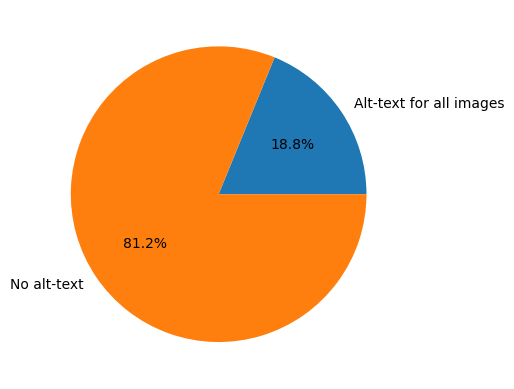

In [18]:
fig, ax = plt.subplots()
ax.pie(
    [atxt_yes_tot, atxt_no_tot],
    labels = ['Alt-text for all images', 'No alt-text'],
    autopct = '%1.1f%%'
)

This first chart shows the overall general use of alt text (image description) in the set of posts under analysis. We notice that more than ⅘ of them *do not* contain any image description. Only 19% of them do.

### Analyzing client data

In this section, we will analyze the total number of posts per client. During the initial data exploration, we observed that many clients have only one post. Our objective is to explore how many clients fall into this category and determine whether it would be beneficial to treat this group differently to reduce potential noise in the dataset.

In [19]:
##Count how many posts_counts by client

#select columns we want to analyze
data_selected = data[['client', 'posts']].head(20) # view only the first 20 clients to get a general overview of how they behave
data_selected

,client,posts
0,Web,8265
1,dlvr.it,5806
2,Mastodon for Android,1891
4,AboveMaidstoneBot,1339
5,Mastodon for iOS,1051
6,Buffer,794
7,Indie 102.3 Playlist Bot,571
8,Tusky,503
9,KUVO Playlist Bot,365
10,The Colorado Sound Playlist Bot,361


<module 'matplotlib.pyplot' from '/home/tommi/dev/mastodon-alt-text/.venv/lib64/python3.13/site-packages/matplotlib/pyplot.py'>

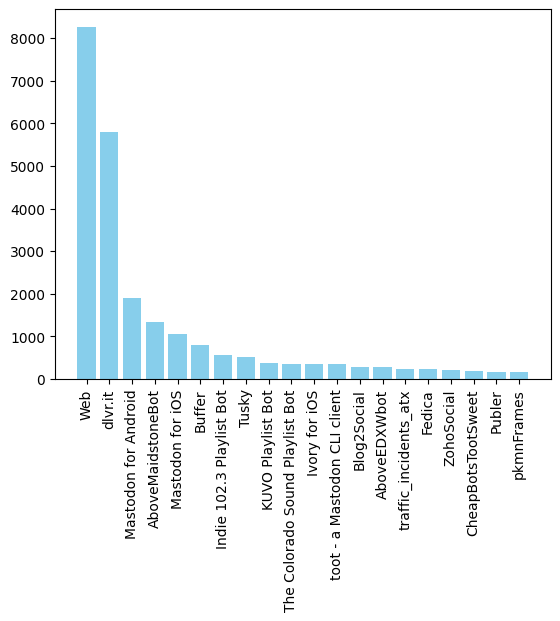

In [20]:
#barplot: review top 20 clients with more posts
plt.bar(data_selected['client'],data_selected['posts'],color = 'skyblue')
plt.xticks(rotation=90)
plt

The bar plot reveals that, among the top 20 clients, the Web client has the highest number of posts (8272), while pkmnFrames has only 163 posts. This highlights a significant disparity in the number of posts even within the top 20 clients, showcasing the wide variation in engagement levels between the extremes.

In [21]:
# we want to know how many clients from the 266 clients have only one post, we will filter the data where posts=1
data_clients_mode = data[data['posts'] == mode]
data_clients_mode

,client,posts,atxt_yes,atxt_yes_pct,atxt_no,atxt_no_pct
243,Mastoot,1,0,0.0,1,100.0
242,AEGIS FS Poster App,1,0,0.0,1,100.0
240,Epic News Canada,1,0,0.0,1,100.0
241,PixelDroid,1,0,0.0,1,100.0
233,Sanweb,1,0,0.0,1,100.0
232,Rodent,1,0,0.0,1,100.0
239,UnitedSpaceCats,1,1,100.0,0,0.0
238,tgbot-mastodon-sync,1,0,0.0,1,100.0
237,AutstralianArtGallery_clientcred.secret,1,1,100.0,0,0.0
236,TweeseCake,1,1,100.0,0,0.0


In [22]:
clients = len(data)
clients_mode = len(data_clients_mode)

print(f'Total of clients: {clients}\nClients containing {mode} post: {clients_mode}')

Total of clients: 265
Clients containing 1 post: 52


In [23]:
clients_mode_pct = (clients_mode/len(data))*100
print(f'Around {round(clients_mode_pct,1)}% of the clients in the data set have only one post')

Around 19.6% of the clients in the data set have only one post


The `posts_count` analysis groups the number of posts and counts how many clients fall into each group. For example, there are 52 clients with only one post, 31 clients with two posts, and so on. This distribution clearly indicates that a significant portion of clients have only one post. Such a notable concentration suggests it might be more meaningful to treat these single-post clients as a separate cluster and analyze them independently to reduce potential noise in the dataset and gain more targeted insights.

In [24]:
'''
Comparing this with the entire data set:
we want to count how many clients have the same number of posts.
'''
posts = data['posts'].value_counts().sort_index()
posts

posts
1       52
2       31
3       18
4       14
5        7
        ..
1051     1
1339     1
1891     1
5806     1
8265     1
Name: count, Length: 79, dtype: int64

Text(0.5, 1.0, 'Frequency of total posts counted by client')

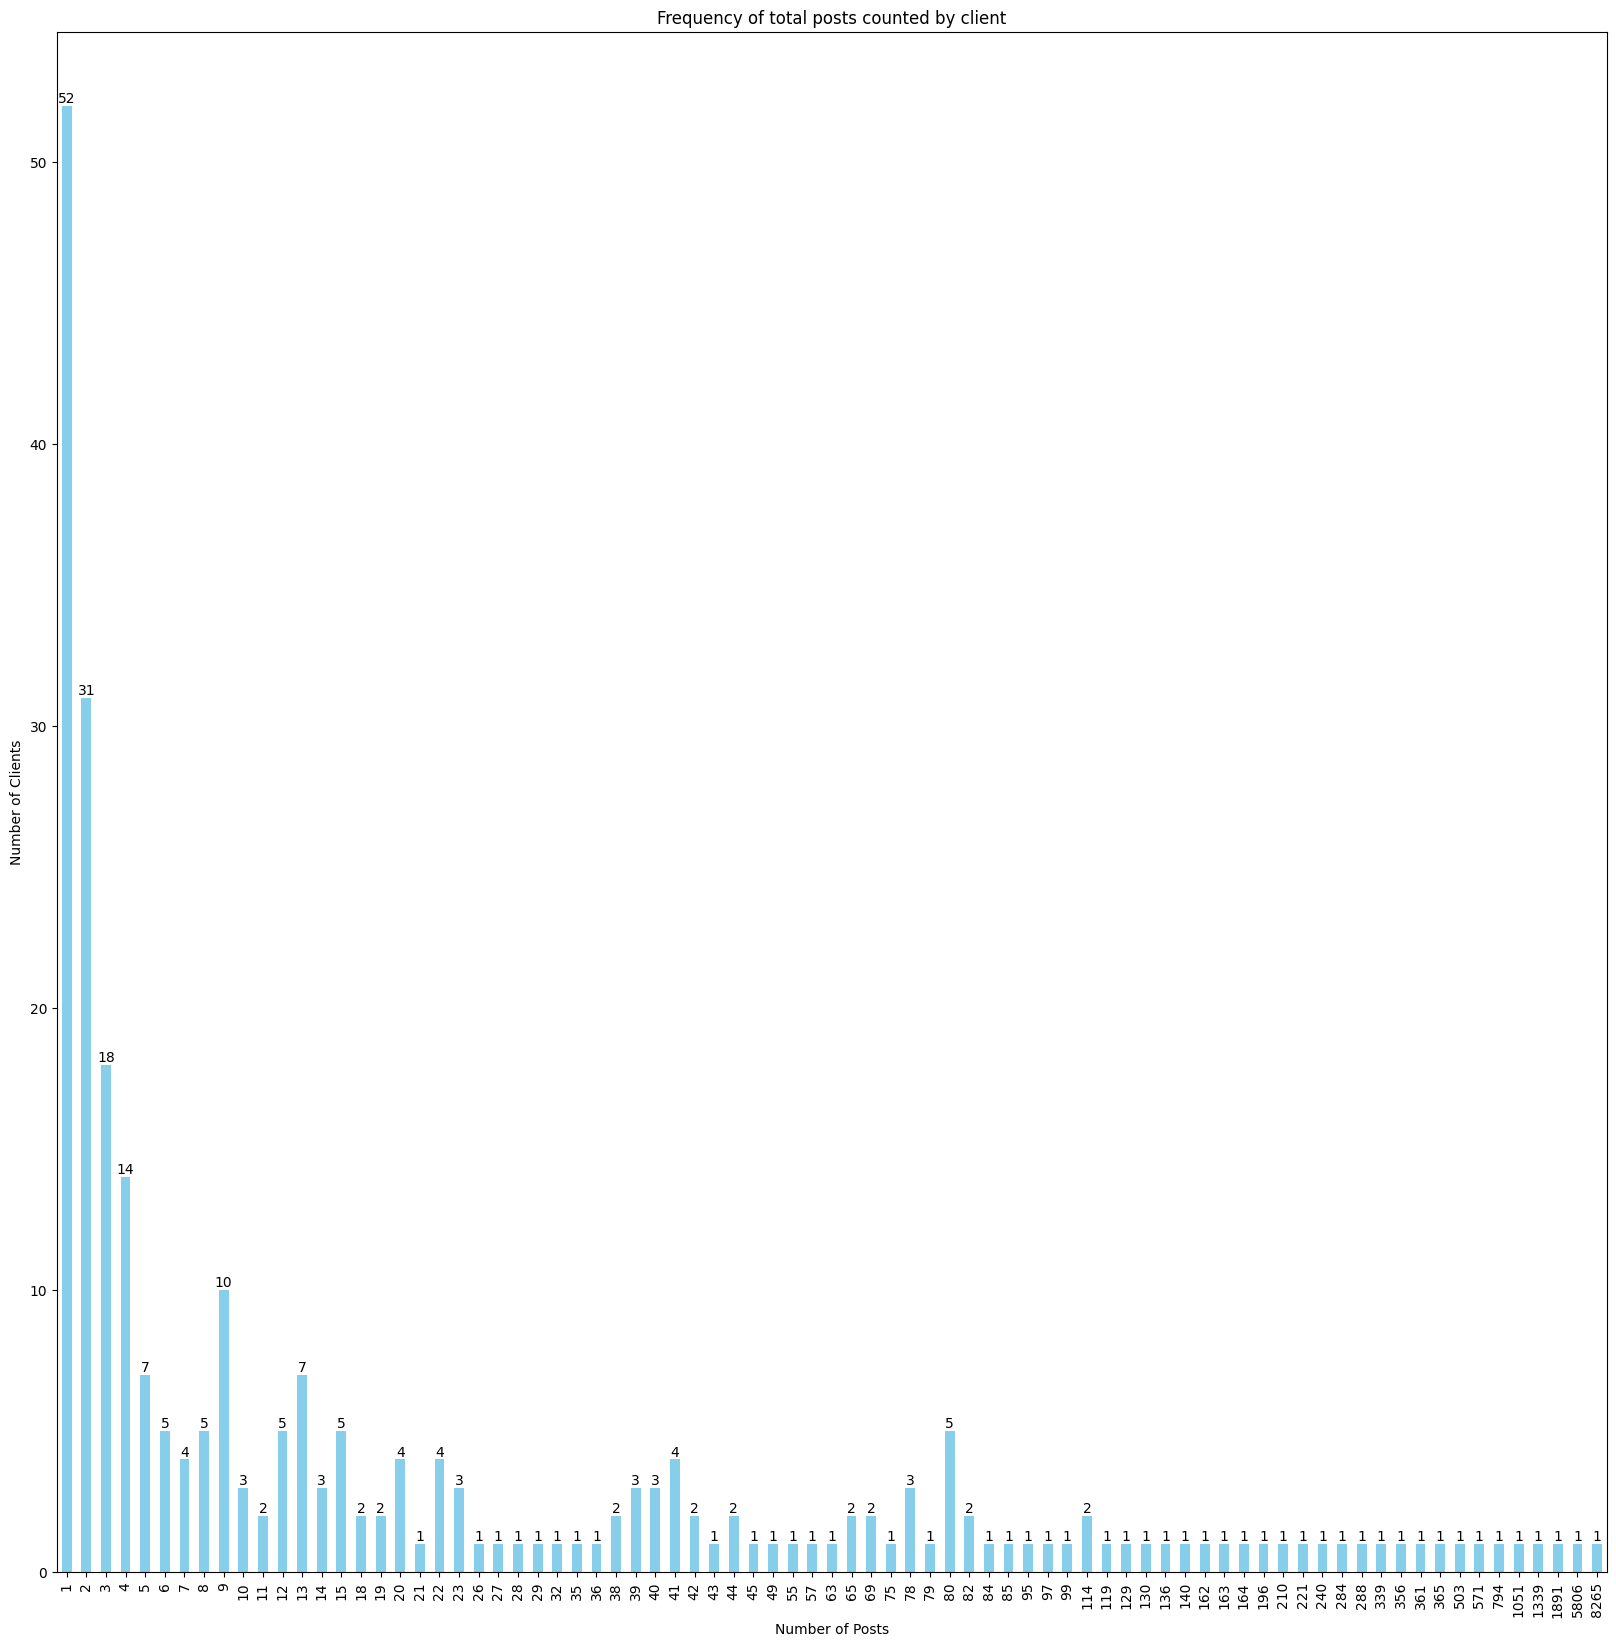

In [25]:
# Create a bar plot
plt.figure(figsize=(20, 20))
bars = posts.plot(kind='bar', color='skyblue')

for idx, value in enumerate(posts):
    plt.text(idx, value, str(value), ha='center', va='bottom', fontsize=10, color='black')

# Add labels and title
plt.xlabel("Number of Posts")
plt.ylabel("Number of Clients")
plt.title("Frequency of total posts counted by client")

The Frequency of total post clients shows how there is a big amount (52 out of 265) clients that have only one post. Furthermore, we can observe that the majority of clients that contains between 1 and 4 posts. For these reason, we will follow the analysis by separating the data set. Initially, we will be anaylzing all the clients that have more than 4 posts.

Text(0.5, 1.0, 'Frequency of total posts counted by client')

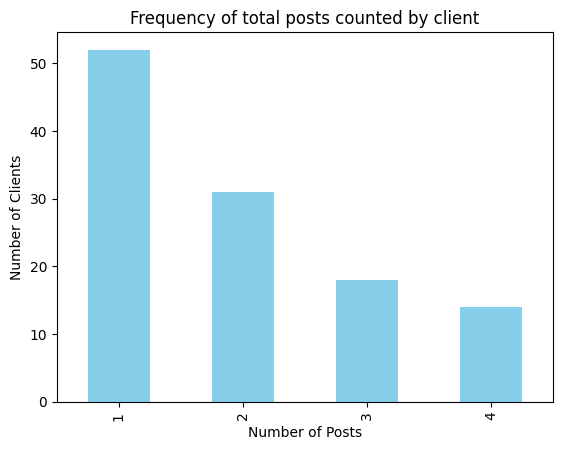

In [26]:
## Let's take a closer look : Filter out post counts with less than 4 posts, based on the data it still be a higher number of clients for those.
posts = posts[(posts.index >= 1) & (posts.index <= 4)]

# Ensure the values are numeric
posts.astype(int)

# Create a bar plot
plt.figure()
posts.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Number of Posts')
plt.ylabel('Number of Clients')
plt.title('Frequency of total posts counted by client')

Clients that have more than 4 postsThe previous graphs highlights that the majority of clients in the dataset have either one or two posts. This behavior suggests a distinct pattern that warrants separate analysis for these clients. To better understand their impact and characteristics, we will proceed by dividing the dataset into two groups: one consisting of clients with one or two posts, and the other including all remaining clients. This approach will allow for a more focused and meaningful analysis of each group.

### Clients that have more than 4 posts

In [27]:
#Separate data set by excluding 52 clients with only one post

cl_more_post = data[data['posts'] > 4]
len(cl_more_post)

150

In [28]:
type(cl_more_post)

pandas.core.frame.DataFrame

In [29]:
# Sort the data frame from the clients with the highest percentage of alt text use
cl_more_post = cl_more_post.sort_values('atxt_yes_pct', ascending=False)

In [30]:
# How many and which are the clients that do not have alt text in their images
no_atxt_cl_more = cl_more_post[cl_more_post['atxt_yes'] == 0]
no_atxt_cl_more

,client,posts,atxt_yes,atxt_yes_pct,atxt_no,atxt_no_pct
20,pkmnFrames,163,0,0.0,163,100.0
15,traffic_incidents_atx,240,0,0.0,240,100.0
14,AboveEDXWbot,284,0,0.0,284,100.0
4,AboveMaidstoneBot,1339,0,0.0,1339,100.0
53,MicroTrailers,49,0,0.0,49,100.0
...,...,...,...,...,...,...
143,BisaBoard,6,0,0.0,6,100.0
146,SocialBu,5,0,0.0,5,100.0
145,The Pink Zune,5,0,0.0,5,100.0
148,LostFilm push,5,0,0.0,5,100.0


In [31]:
print(f'There are {len(no_atxt_cl_more)} clients whose posts do not have any alt text.')

There are 72 clients whose posts do not have any alt text.


We arbitrarily choose to set 60% of alt text use as a threshold to investigate current data.

In [32]:
cl_more_post_pct = cl_more_post[cl_more_post['atxt_yes_pct'] >= 60]
cl_more_post_pct

,client,posts,atxt_yes,atxt_yes_pct,atxt_no,atxt_no_pct
9,KUVO Playlist Bot,365,365,100.0,0,0.0
7,Indie 102.3 Playlist Bot,571,571,100.0,0,0.0
10,The Colorado Sound Playlist Bot,361,361,100.0,0,0.0
129,BirdBuddy,9,9,100.0,0,0.0
121,Bohn Temps Hourly Poster,9,9,100.0,0,0.0
118,ActivityPub.jl,10,10,100.0,0,0.0
55,TheInsiderByNB,44,44,100.0,0,0.0
63,Pokémon Facts,41,41,100.0,0,0.0
61,EveryPkmnCard,41,41,100.0,0,0.0
60,My User Count,41,41,100.0,0,0.0


In [33]:
print(f'{len(cl_more_post_pct)} clients have more 60% than of the posts with image description.')

44 clients have more 60% than of the posts with image description.


<module 'matplotlib.pyplot' from '/home/tommi/dev/mastodon-alt-text/.venv/lib64/python3.13/site-packages/matplotlib/pyplot.py'>

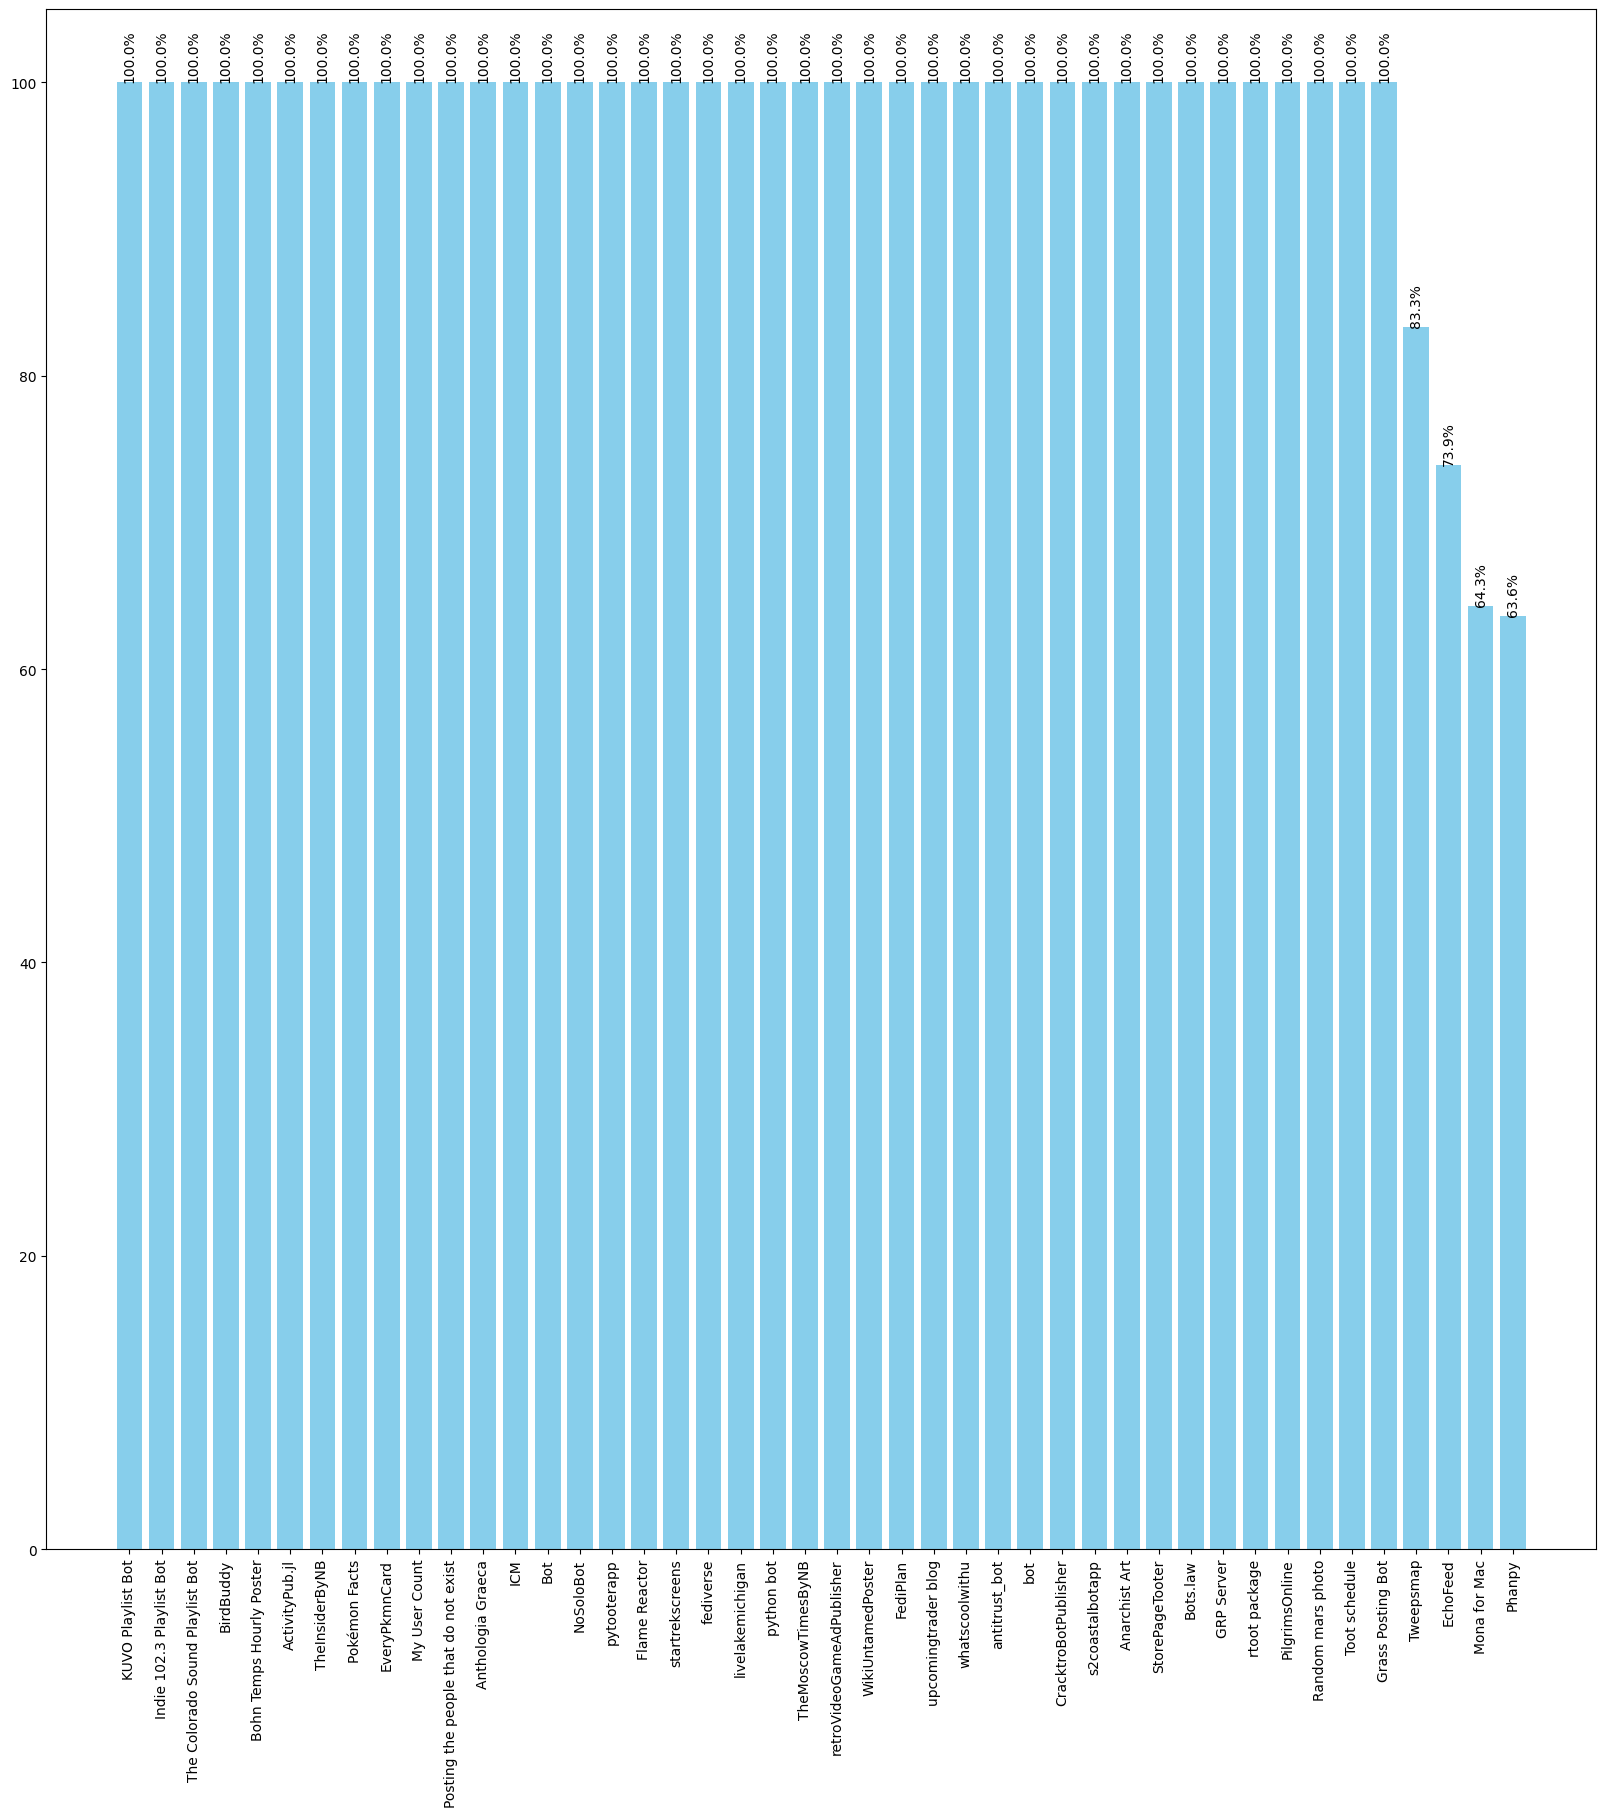

In [34]:
# Create a bar plot
plt.figure(figsize=(20, 20))
plt.bar(cl_more_post_pct['client'],cl_more_post_pct['atxt_yes_pct'],color = 'skyblue')

# Add percentage values inside the bars
for i in range(len(cl_more_post_pct)):
    x = cl_more_post_pct['client'].iloc[i]  # Get the x position for the bar
    bar_height = cl_more_post_pct['atxt_yes_pct'].iloc[i]  # Get the height of the bar
    
    # Annotate the percentage value
    plt.text(x, bar_height, f'{bar_height:.1f}%', ha='center', va='bottom', color='black', fontsize=10, rotation=90)

    
plt.xticks(rotation=90)
plt

/tmp/ipykernel_58376/2347707260.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl_more_post_pct['label'] = cl_more_post_pct.apply(lambda row: f'{row['client']}\n{row['atxt_yes']} posts\n({row['atxt_yes_pct']:.1f}%)', axis=1)


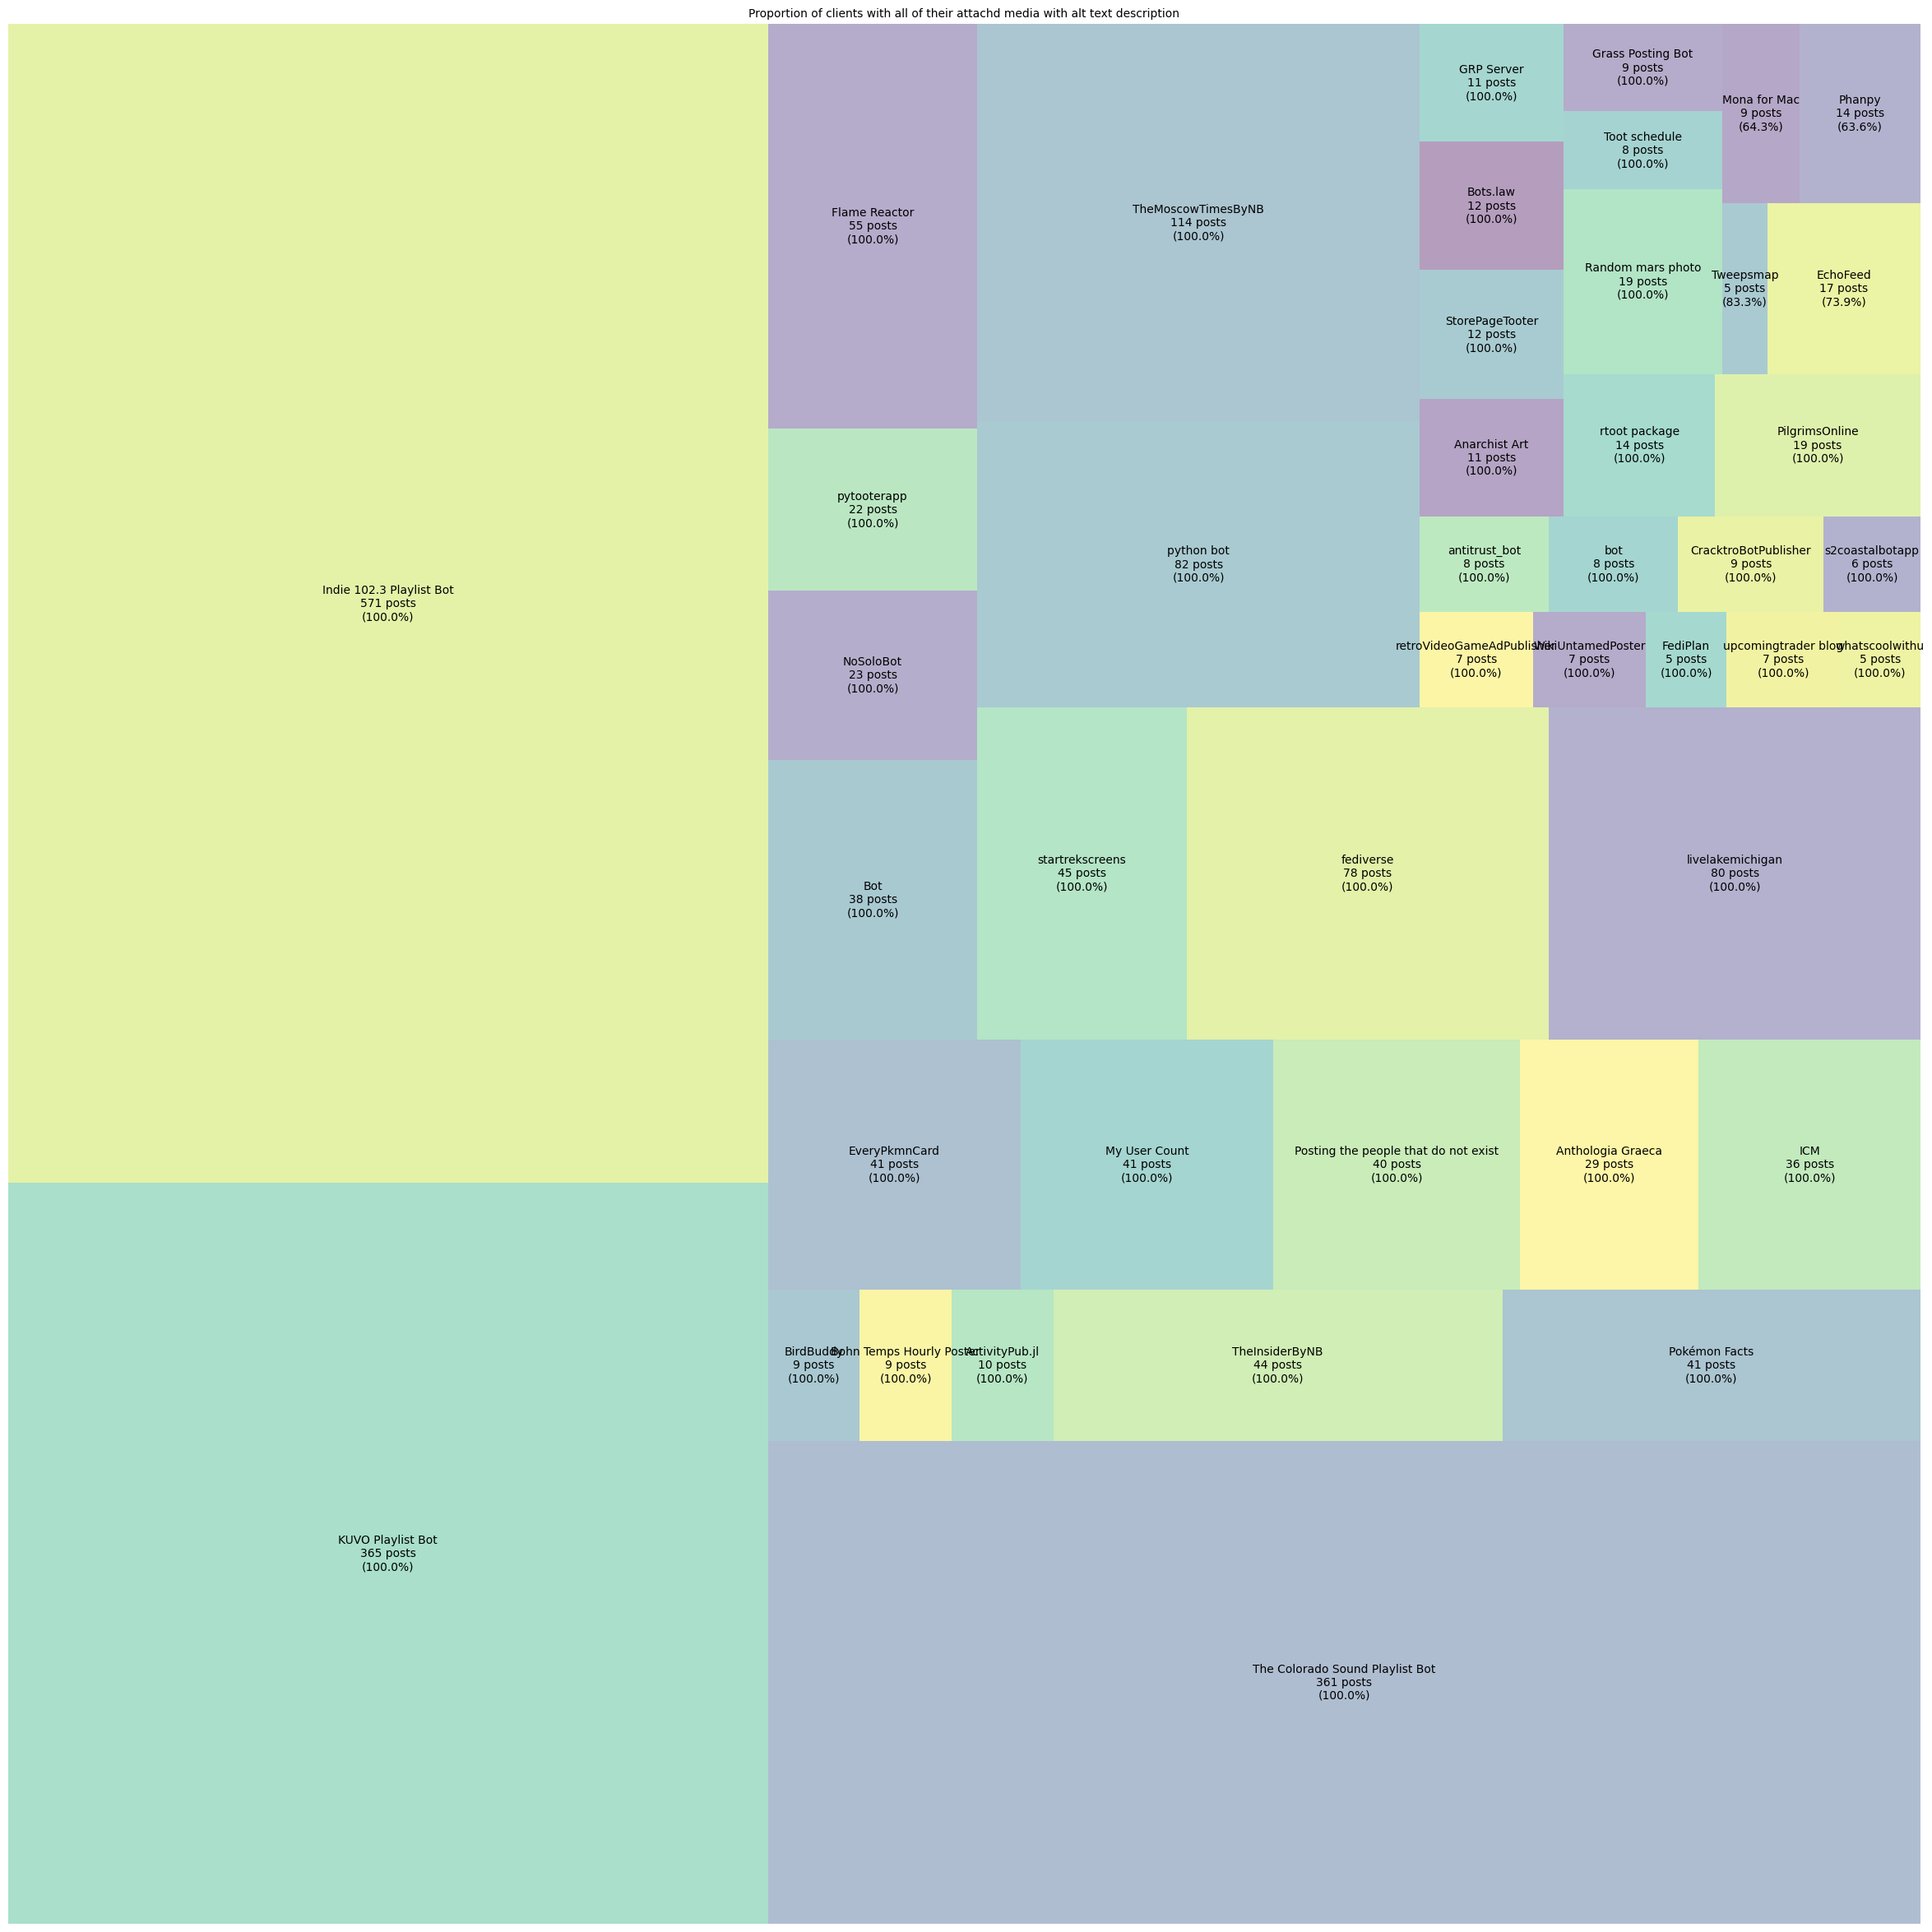

In [35]:
## visualization to see the proportions of clients on their contribution on the alt text images

#confirm percentages of alttext_all_percent
#labels
cl_more_post_pct['label'] = cl_more_post_pct.apply(lambda row: f'{row['client']}\n{row['atxt_yes']} posts\n({row['atxt_yes_pct']:.1f}%)', axis=1)
    
# Treemap plotting
plt.figure(figsize=(30, 30))
sq.plot(sizes=cl_more_post_pct['atxt_yes'], label=cl_more_post_pct['label'], alpha=0.4)
plt.title('Proportion of clients with all of their attachd media with alt text description', fontsize=10)
plt.axis('off')  # No axes for treemap
plt.show()

The tree map provides a clear visual representation of the proportion of alt text usage among clients, based on their total number of posts. It highlights that KUVO Playlist Bot, Indie 102.3 Playlist Bot, and The Colorado Sound Playlist Bot not only have the highest total post counts but also demonstrate exemplary performance with 100% of their images containing alt text. This indicates that these three clients are among the best performers in utilizing alt text effectively.

<Axes: >

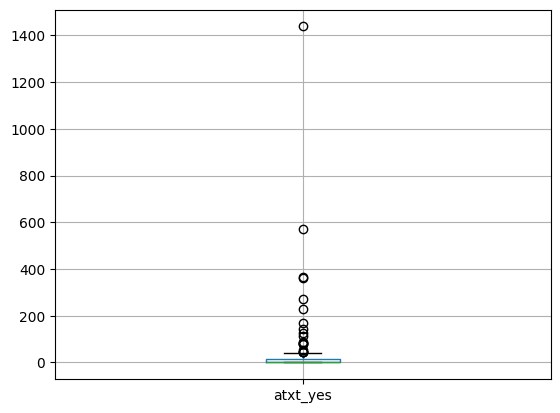

In [36]:
cl_more_post[['atxt_yes']].boxplot()

<Axes: ylabel='Count'>

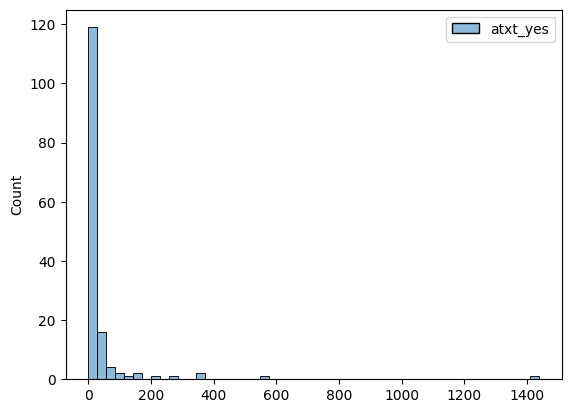

In [37]:
sns.histplot(cl_more_post[['atxt_yes']], bins=50, kde=False, color='skyblue', edgecolor='black')

## Conclusion and future development

Even though the Fediverse and alternative social networks supposedly are more sensitive to ethical issues, this analysis showed without any doubt that the use of image descriptions is still too limited.

Our analysis proved to be extremely informative concerning some aspects in particular. Despite what we were expecting, we discovered that a great number of clients was used to published only very few posts, and we facced the chellenge of deciding how to treat this surprising knowledge.

We believe that there is a great room for expansion and deepening of this analysis, not merely in terms of development, but chiefly in relation to the expansion of the dataset, in particular:

- by updating the dataset to a more recent date
- by including more posts in the dataset
- by gathering information from other servers outside of mastodon.social
- by cross-referencing alt text use among different servers, not only among different clients

Lastly, we believe it would be very interesting, also using skills and tools learned from other courses, to investigate the qualities and the design on the most popular clients, pinpointing best practices to incentivize users to add image descriptions.